# HW: Continuous Random Variables

**Name:** Sae-Jin Moon (rhn9qs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sympy import symbols, integrate, sin, sqrt, pi, acos, Abs, N

plt.style.use('seaborn-v0_8-whitegrid')

## Question 1: Baseball Batting Average
Beta(81, 219)

(a) Probability (0.250 < X < 0.300): 0.6579
(b) 90th percentile: 0.3031


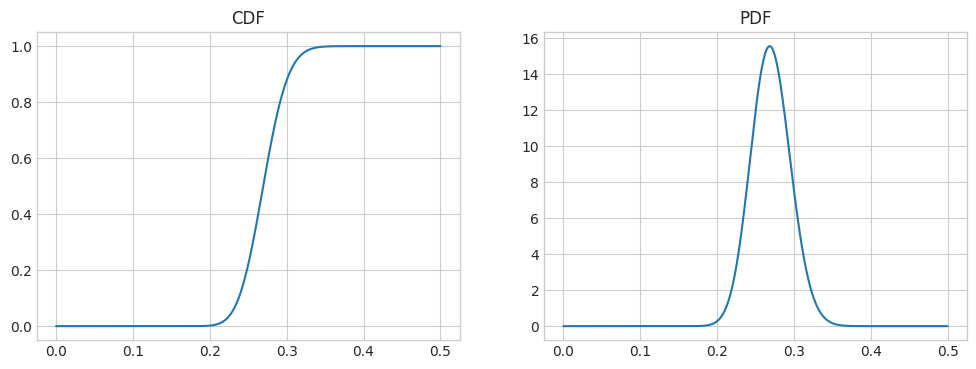

In [2]:
alpha, beta_param = 81, 219
dist = stats.beta(alpha, beta_param)

#(a) probability between 0.250 and 0.300
prob_a = dist.cdf(0.300) - dist.cdf(0.250)
print(f"(a) Probability (0.250 < X < 0.300): {prob_a:.4f}")

#(b) 90th percentile
p90 = dist.ppf(0.90)
print(f"(b) 90th percentile: {p90:.4f}")

#(c) plot CDF and PDF
x = np.linspace(0, 0.5, 500) # focusing on relevant range
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x, dist.cdf(x))
ax[0].set_title("CDF")
ax[1].plot(x, dist.pdf(x))
ax[1].set_title("PDF")
plt.show()

## Question 2: Project Completion
Beta(5, 2)

In [3]:
a, b = 5, 2
dist = stats.beta(a, b)

#(a) expected proportion
mean_val = dist.mean()
print(f"(a) Expected proportion: {mean_val:.4f}")

#(b) probability < 60%
prob_b = dist.cdf(0.60)
print(f"(b) Probability less than 60%: {prob_b:.4f}")

(a) Expected proportion: 0.7143
(b) Probability less than 60%: 0.2333


## Question 3: Manufacturing Quality
Normal(10.0, 0.05²)

(a) Percentage failing specs: 4.55%
(b) Expected rejected: 455
(c) Density at 10.0mm: 7.9788


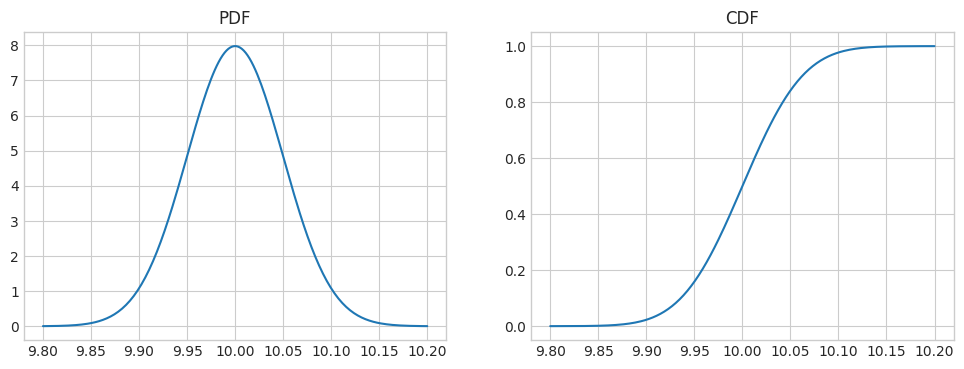

In [4]:
mu, sigma = 10.0, 0.05
dist = stats.norm(mu, sigma)

#(a) percentage fail (outside 9.9 and 10.1)
fail_prob = 1 - (dist.cdf(10.1) - dist.cdf(9.9))
print(f"(a) Percentage failing specs: {fail_prob * 100:.2f}%")

#(b) expected rejected per 10,000
rejected = 10000 * fail_prob
print(f"(b) Expected rejected: {rejected:.0f}")

#(c) pDF at 10.0
dens = dist.pdf(10.0)
print(f"(c) Density at 10.0mm: {dens:.4f}")

#(d) plot PDF and CDF
x = np.linspace(9.8, 10.2, 200)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x, dist.pdf(x))
ax[0].set_title("PDF")
ax[1].plot(x, dist.cdf(x))
ax[1].set_title("CDF")
plt.show()

## Question 4: Standardized Test Scores
Normal(520, 115²)

In [5]:
mu, sigma = 520, 115
dist = stats.norm(mu, sigma)

#(a) top 10% cutoff
cutoff = dist.ppf(0.90)
print(f"(a) Minimum score for top 10%: {cutoff:.2f}")

#(b) probability between 500 and 650
prob_b = dist.cdf(650) - dist.cdf(500)
print(f"(b) Probability between 500 and 650: {prob_b:.4f}")

#(c) probability all 5 > 600
prob_one_gt_600 = dist.sf(600) # survival function is 1-cdf
prob_all_5 = prob_one_gt_600 ** 5
print(f"(c) Probability all 5 score > 600: {prob_all_5:.6f}")

(a) Minimum score for top 10%: 667.38
(b) Probability between 500 and 650: 0.4399
(c) Probability all 5 score > 600: 0.000853


## Question 5: Annual Rainfall
Gamma(shape=2, scale=3)

(a) Probability > 9 inches: 0.1991
(b) Probability between 3 and 6 inches: 0.3298
(c) Median rainfall: 5.0350
(d) Mean rainfall: 6.0000


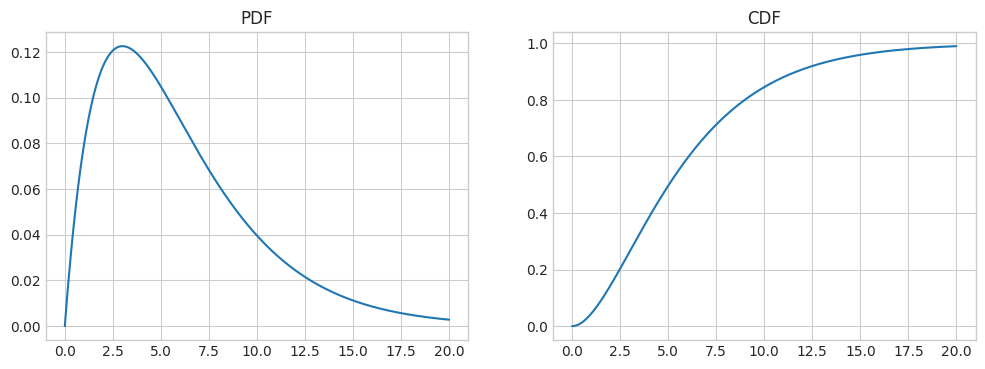

In [6]:
shape, scale = 2, 3
dist = stats.gamma(a=shape, scale=scale)

#(a) prob > 9
prob_a = dist.sf(9)
print(f"(a) Probability > 9 inches: {prob_a:.4f}")

#(b) prob between 3 and 6
prob_b = dist.cdf(6) - dist.cdf(3)
print(f"(b) Probability between 3 and 6 inches: {prob_b:.4f}")

#(c) median
med = dist.ppf(0.5)
print(f"(c) Median rainfall: {med:.4f}")

#(d) mean
mu = dist.mean()
print(f"(d) Mean rainfall: {mu:.4f}")

#(e) plot
x = np.linspace(0, 20, 200)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(x, dist.pdf(x)); ax[0].set_title('PDF')
ax[1].plot(x, dist.cdf(x)); ax[1].set_title('CDF')
plt.show()

## Question 6: Insurance Claims
Gamma(shape=2.5, scale=4)

In [7]:
shape, scale = 2.5, 4
dist = stats.gamma(a=shape, scale=scale)

#(a) % exceeding 15
perc = dist.sf(15) * 100
print(f"(a) Percentage exceeding $15k: {perc:.2f}%")

#(b) density at 10
dens = dist.pdf(10)
print(f"(b) Density at $10k: {dens:.4f}")

#(c) 90% below value (90th percentile)
val_90 = dist.ppf(0.9)
print(f"(c) 90th percentile claim: ${val_90:.2f}k")

(a) Percentage exceeding $15k: 18.60%
(b) Density at $10k: 0.0610
(c) 90th percentile claim: $18.47k


## Question 7: Customer Arrivals
Exponential($\lambda=4$). Scale = $1/\lambda$.

(a) Probability < 0.5 mins: 0.8647
(b) Probability > 2 mins: 0.0003
(c) 90th percentile time: 0.5756 mins


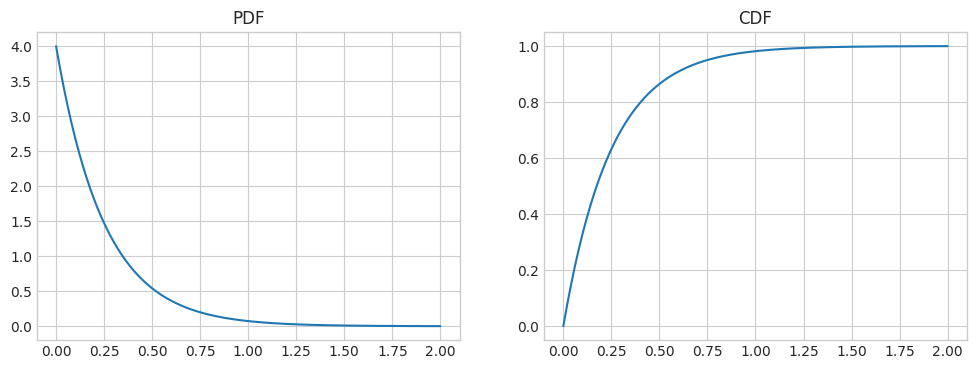

In [8]:
lam = 4
dist = stats.expon(scale=1/lam)

#(a) prob < 0.5 mins
prob_a = dist.cdf(0.5)
print(f"(a) Probability < 0.5 mins: {prob_a:.4f}")

#(b) prob > 2 mins
prob_b = dist.sf(2)
print(f"(b) Probability > 2 mins: {prob_b:.4f}")

#(c) 90th percentile
p90 = dist.ppf(0.9)
print(f"(c) 90th percentile time: {p90:.4f} mins")

#(d) plot
x = np.linspace(0, 2, 200)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(x, dist.pdf(x)); ax[0].set_title('PDF')
ax[1].plot(x, dist.cdf(x)); ax[1].set_title('CDF')
plt.show()

## Question 8: Radioactive Decay
Exponential($\lambda=0.05$). Scale = $1/0.05 = 20$.

(a) Probability > 30s: 0.2231
(b) Expected waiting time: 20.00s
(c) Density at t=20: 0.0184


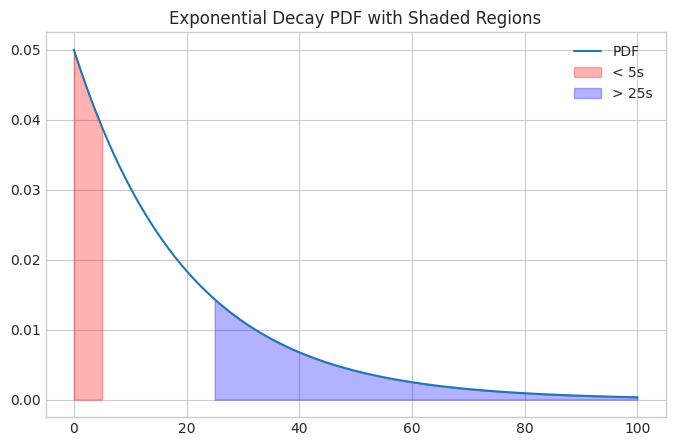

In [9]:
lam = 0.05
dist = stats.expon(scale=1/lam)

#(a) prob > 30s
prob_a = dist.sf(30)
print(f"(a) Probability > 30s: {prob_a:.4f}")

#(b) expected wait
mean_val = dist.mean()
print(f"(b) Expected waiting time: {mean_val:.2f}s")

#(c) density at 20
dens = dist.pdf(20)
print(f"(c) Density at t=20: {dens:.4f}")

#(d) plot with shading
x = np.linspace(0, 100, 500)
plt.figure(figsize=(8, 5))
plt.plot(x, dist.pdf(x), label='PDF')

# shade < 5
x1 = np.linspace(0, 5, 100)
plt.fill_between(x1, dist.pdf(x1), color='red', alpha=0.3, label='< 5s')

# shade > 25
x2 = np.linspace(25, 100, 100)
plt.fill_between(x2, dist.pdf(x2), color='blue', alpha=0.3, label='> 25s')

plt.title("Exponential Decay PDF with Shaded Regions")
plt.legend()
plt.show()

## Question 9: Manufacturing Tolerance
Uniform(98.5, 101.5)

In [10]:
loc = 98.5
width = 101.5 - 98.5
dist = stats.uniform(loc=loc, scale=width)

#(a) prob between 99.4 and 100.2
prob_a = dist.cdf(100.2) - dist.cdf(99.4)
print(f"(a) Probability between 99.4 and 100.2: {prob_a:.4f}")

#(b) 90th percentile
p90 = dist.ppf(0.9)
print(f"(b) 90th percentile: {p90:.2f} cm")

(a) Probability between 99.4 and 100.2: 0.2667
(b) 90th percentile: 101.20 cm


## Question 10: ER Wait Times
Uniform(10, 40)

(a) Threshold: 37.00 mins


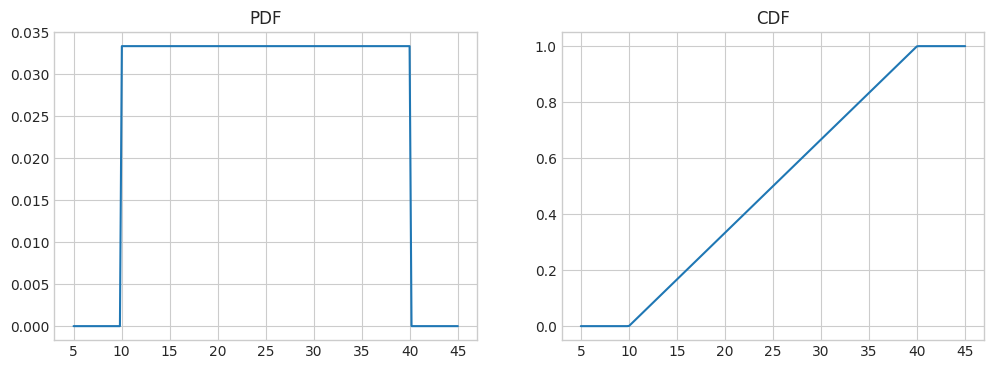

In [11]:
loc = 10
width = 40 - 10
dist = stats.uniform(loc=loc, scale=width)

#(a) 90% wait less than X (90th percentile)
thresh = dist.ppf(0.9)
print(f"(a) Threshold: {thresh:.2f} mins")

#(b) plot
x = np.linspace(5, 45, 200)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(x, dist.pdf(x)); ax[0].set_title('PDF')
ax[1].plot(x, dist.cdf(x)); ax[1].set_title('CDF')
plt.show()

## Question 11: Randomized Appointment Scheduling
Uniform 8:00 to 12:00.  
Map time to hours past 8:00: range [0, 4].

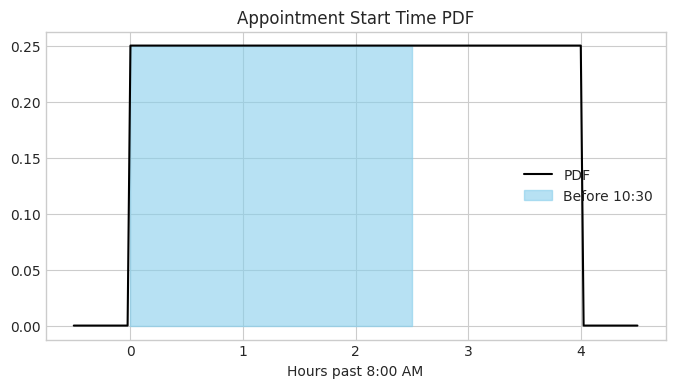

(c) Probability between 9:30 and 10:45: 0.3125


In [12]:
dist = stats.uniform(0, 4)

#(a) & (b) plot and shade < 10:30 (2.5 hours past 8)
x = np.linspace(-0.5, 4.5, 200)
plt.figure(figsize=(8, 4))
plt.plot(x, dist.pdf(x), 'k', label='PDF')

# shade < 2.5
x_shade = np.linspace(0, 2.5, 100)
plt.fill_between(x_shade, dist.pdf(x_shade), color='skyblue', alpha=0.6, label='Before 10:30')

plt.title("Appointment Start Time PDF")
plt.xlabel("Hours past 8:00 AM")
plt.legend()
plt.show()

#(c) prob between 9:30 (1.5) and 10:45 (2.75)
prob_c = dist.cdf(2.75) - dist.cdf(1.5)
print(f"(c) Probability between 9:30 and 10:45: {prob_c:.4f}")

## Question 12
Density $f(x) = c\sqrt{1-x^2}$ for $-1 \leq x \leq 1$.

This function describes a semi-circle of radius 1. The area under the curve $\sqrt{1-x^2}$ from -1 to 1 is $\frac{\pi r^2}{2} = \frac{\pi}{2}$.

Since $\int f(x)dx = 1$:
$$ c \cdot \frac{\pi}{2} = 1 \implies c = \frac{2}{\pi} $$

## Question 13
Density $f(x) = c\sqrt{1-x^2}$ for $0 \leq x \leq 1$.

This describes a quarter-circle of radius 1. The area is $\frac{\pi}{4}$.

Since $\int f(x)dx = 1$:
$$ c \cdot \frac{\pi}{4} = 1 \implies c = \frac{4}{\pi} $$

## Question 14
Density $f(x) = \frac{1}{2}\sin(x)$ for $0 \leq x \leq \pi$.

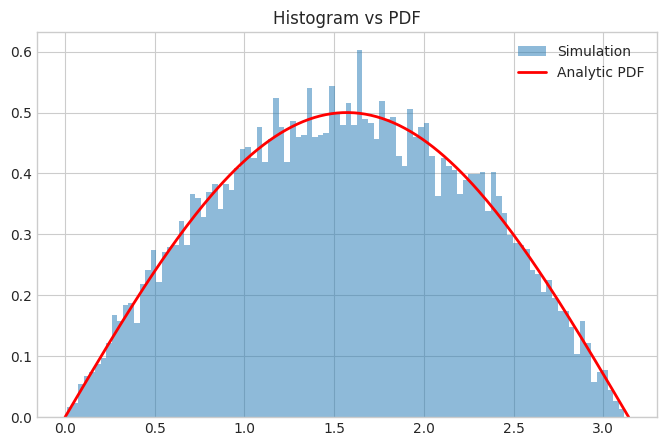

In [13]:
# (a) histogram with density overlay
def b_rvs(n):
    return np.arccos(-2*np.random.uniform(size=n) + 1)

x_draws = b_rvs(10000)
x_grid = np.linspace(0, np.pi, 200)
pdf_grid = 0.5 * np.sin(x_grid)

plt.figure(figsize=(8, 5))
plt.hist(x_draws, bins=100, density=True, alpha=0.5, label='Simulation')
plt.plot(x_grid, pdf_grid, 'r-', lw=2, label='Analytic PDF')
plt.legend()
plt.title("Histogram vs PDF")
plt.show()

In [14]:
# (b) simulated E[X]
mean_sim = np.mean(x_draws)
print(f"(b) Simulated E[X]: {mean_sim:.4f}")

(b) Simulated E[X]: 1.5649


In [15]:
# (c) analytic E[X]
x_sym = symbols('x')
mean_analytic = integrate(x_sym * sin(x_sym)/2, (x_sym, 0, pi))
print(f"(c) Analytic E[X]: {mean_analytic} ({float(mean_analytic):.4f})")

(c) Analytic E[X]: pi/2 (1.5708)


**(d) Comparison:** The simulated mean is very close to the analytic mean $\pi/2 \approx 1.5708$. The error is negligible.

In [16]:
# (e) simulated Variance
# V[X] = E[X^2] - (E[X])^2
var_sim = np.var(x_draws)
print(f"(e) Simulated Variance: {var_sim:.4f}")

(e) Simulated Variance: 0.4674


In [17]:
# (f) analytic variance
ex2 = integrate(x_sym**2 * sin(x_sym)/2, (x_sym, 0, pi))
var_analytic = ex2 - mean_analytic**2
print(f"(f) Analytic Variance: {var_analytic} ({float(var_analytic):.4f})")

(f) Analytic Variance: -2 + pi**2/4 (0.4674)


In [18]:
# (g) simulated mean absolute difference (from mean)
mad_sim = np.mean(np.abs(x_draws - np.pi/2))
print(f"(g) Simulated MAD: {mad_sim:.4f}")

(g) Simulated MAD: 0.5711


In [19]:
# (h) analytic mean absolute difference
mad_analytic = integrate(Abs(x_sym - pi/2) * sin(x_sym)/2, (x_sym, 0, pi))
print(f"(h) Analytic MAD: {mad_analytic} ({float(mad_analytic):.4f})")

(h) Analytic MAD: -1 + pi/2 (0.5708)


In [20]:
# (i) simulated IQR
q75, q25 = np.percentile(x_draws, [75, 25])
iqr_sim = q75 - q25
print(f"(i) Simulated IQR: {iqr_sim:.4f}")

(i) Simulated IQR: 1.0539


**(j) Analytic IQR:**

The CDF is $F(x) = \int_0^x \frac{1}{2}\sin(t) dt = \frac{1}{2}(1 - \cos x)$.

For Q1 (25%):
$$ 0.25 = 0.5(1 - \cos x) \implies 0.5 = 1 - \cos x \implies \cos x = 0.5 \implies x = \frac{\pi}{3} $$

For Q3 (75%):
$$ 0.75 = 0.5(1 - \cos x) \implies 1.5 = 1 - \cos x \implies \cos x = -0.5 \implies x = \frac{2\pi}{3} $$

$$ IQR = Q_3 - Q_1 = \frac{2\pi}{3} - \frac{\pi}{3} = \frac{\pi}{3} $$

In [21]:
iqr_analytic = pi/3
print(f"(j) Analytic IQR: {float(iqr_analytic):.4f}")

(j) Analytic IQR: 1.0472


**(k) Comparison:** The simulation error for IQR is very small.